In [17]:
import hdbscan
from sklearn.cluster import DBSCAN
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print('Unknown system... sorry~')

In [18]:
model = KeyedVectors.load_word2vec_format('../models/camp_w2v.model')

word_vector = model.vectors
word_vectors = model
match_index = model.index_to_key
model.init_sims(replace=True)

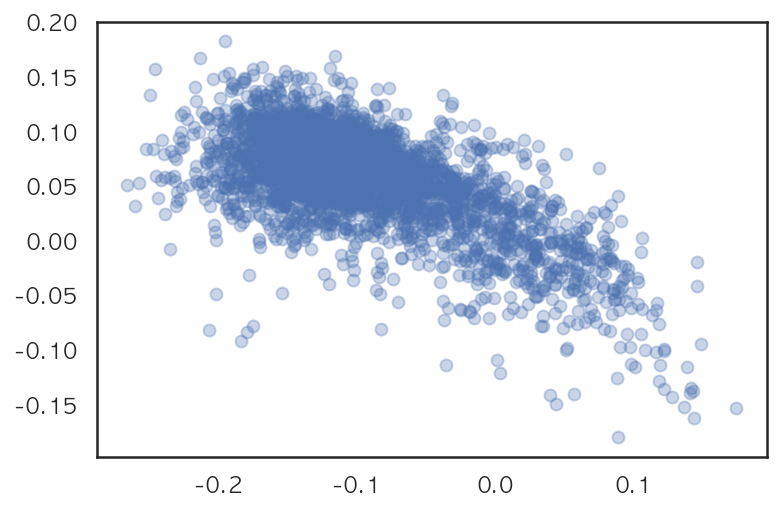

In [19]:
plt.scatter(word_vector.T[0], word_vector.T[1], alpha=0.3)
plt.show()

In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, gen_min_span_tree=True)
clusterer.fit(word_vector)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=8)

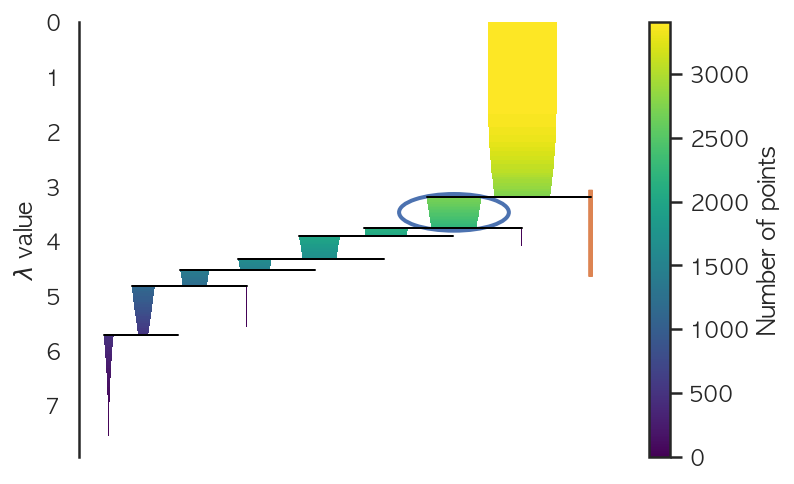

In [21]:
# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [22]:
from sklearn.cluster import DBSCAN

# 모델 객체 생성
model_hds = hdbscan.HDBSCAN(min_cluster_size=6).fit(word_vector)

# 예측 데이터 생성
pred_hds = model_hds.fit_predict(word_vector)

# 데이터 프레임 만들기
df = pd.DataFrame(word_vector)
df["labels"] = pred_hds

df.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,labels
3401,-0.131829,0.019346,0.075282,0.009087,0.065579,-0.216291,0.058279,0.264654,-0.063274,-0.064990,...,0.068111,-0.027681,0.072638,0.218836,0.146429,0.055605,-0.166504,-0.000814,-0.077796,3
3402,-0.065542,0.016113,0.098029,-0.035444,0.045685,-0.223257,0.014298,0.187983,-0.004637,-0.112017,...,-0.040187,0.043007,0.128175,0.089890,0.184467,0.037606,-0.140398,-0.076668,-0.118169,-1


In [23]:
np.unique(df["labels"])

array([-1,  0,  1,  2,  3,  4])

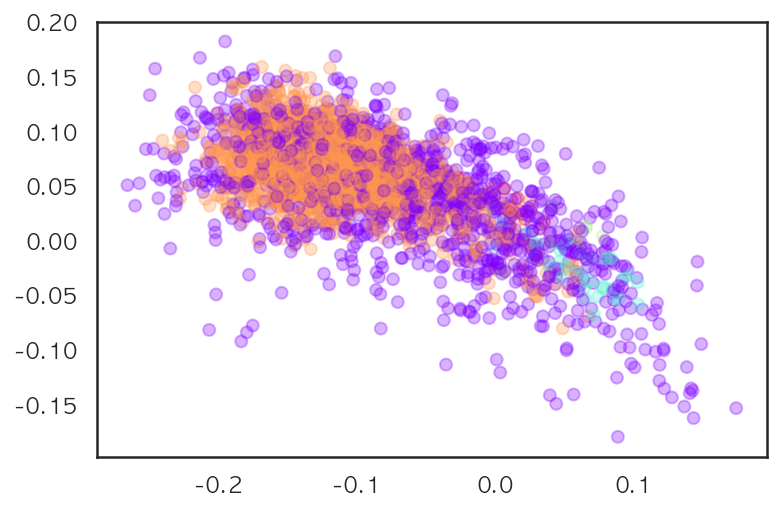

In [24]:
# 그래프 그리기
plt.scatter(df[0], df[1], c=df["labels"], cmap="rainbow", alpha=0.3)
plt.show()

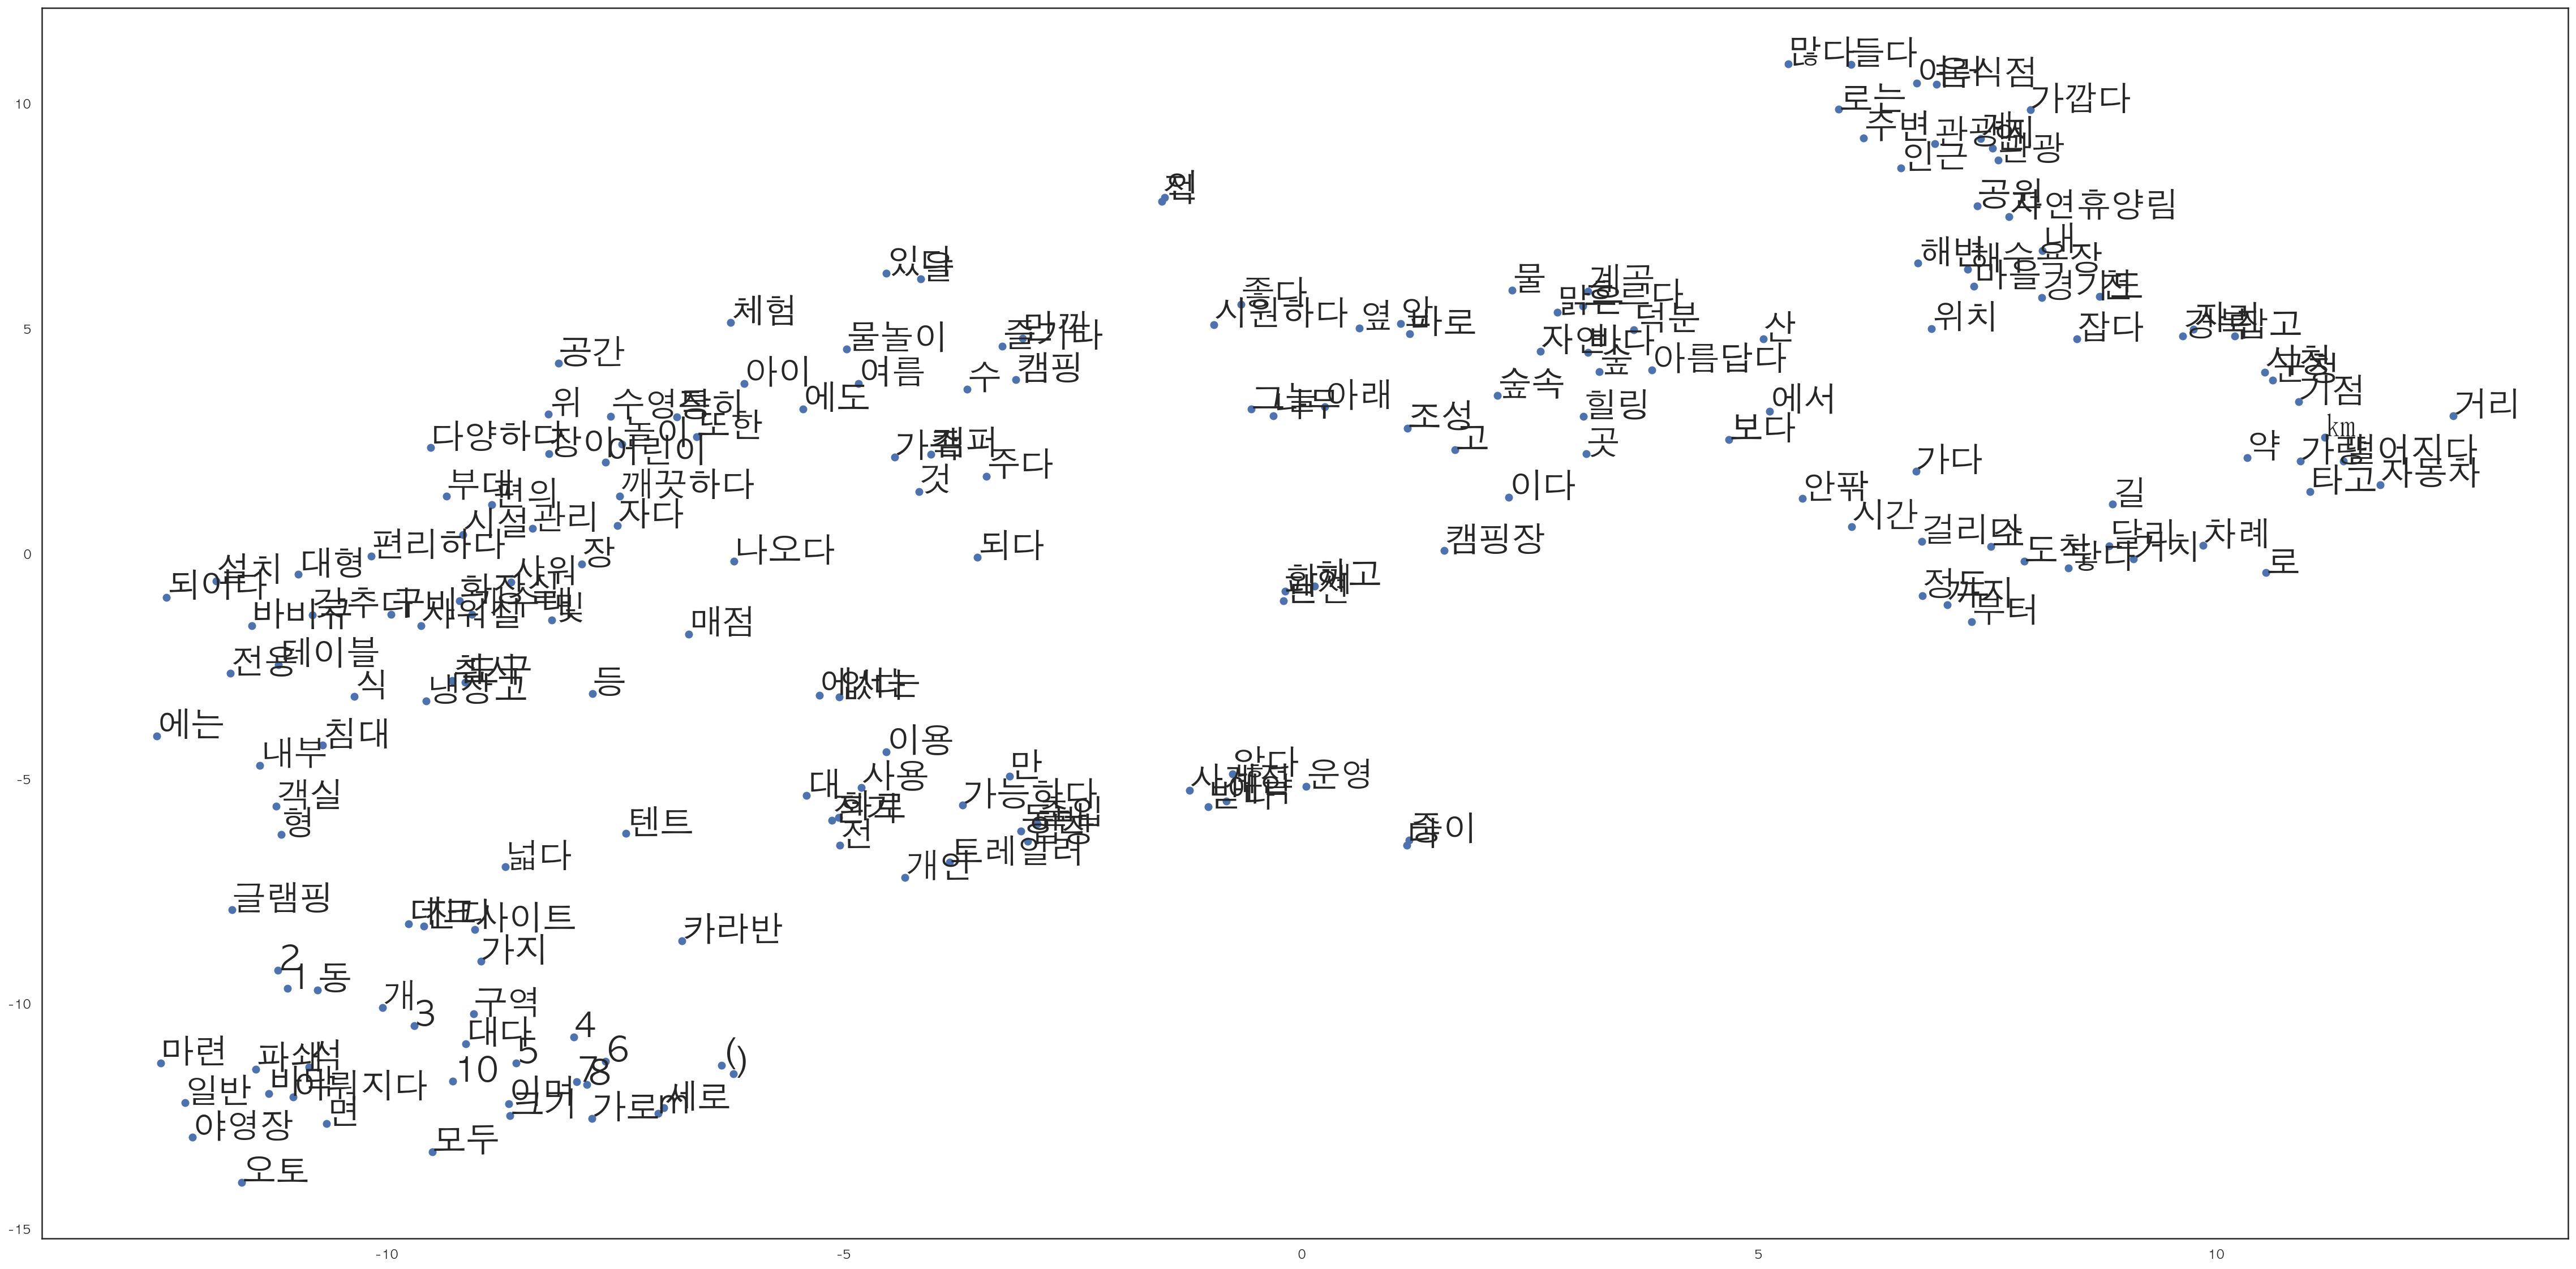

In [33]:
# tsne 차원축소 

vocab = list(match_index)

X = model[vocab]


tsne = TSNE(learning_rate=100)

# 200개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])
df2 = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df2['x'], df2['y'])

for word, pos in df2.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.savefig("word2vec_100")
plt.show()


In [34]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=8, gen_min_span_tree=True)
clusterer.fit(df2)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=8)

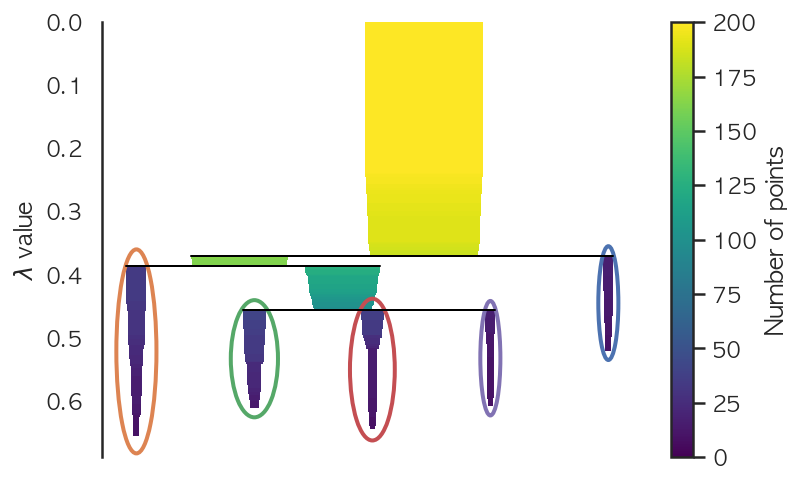

In [35]:
# 클러스터를 몇개로 하면 좋을지 알려줌
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [36]:
from sklearn.cluster import DBSCAN

# 모델 객체 생성
model_hds = hdbscan.HDBSCAN(min_cluster_size=7).fit(word_vector)

# 예측 데이터 생성
pred_hds = model_hds.fit_predict(df2)

# 데이터 프레임 만들기
df3 = pd.DataFrame(df2)
df3["labels"] = pred_hds

df3.tail(2)

,x,y,labels
출입,-2.888957,-5.994913,0
형,-11.152597,-6.236701,-1


In [37]:
np.unique(df3["labels"])

array([-1,  0,  1,  2,  3,  4])

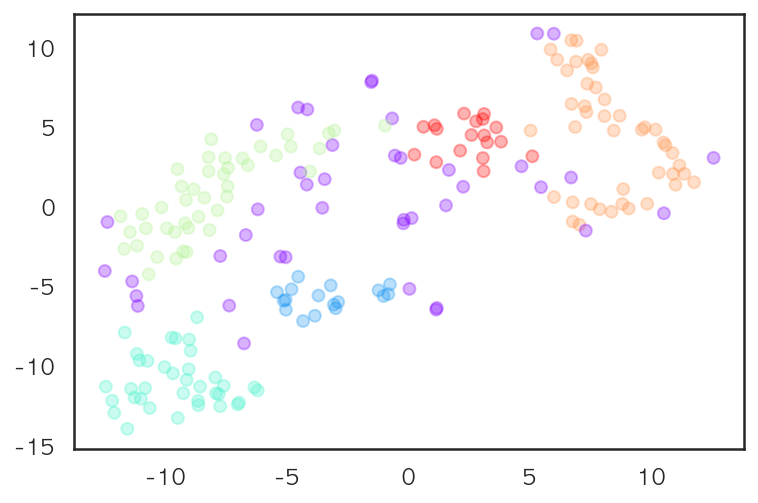

In [38]:
# 그래프 그리기
plt.scatter(df3['x'], df3['y'], c=df3["labels"], cmap="rainbow", alpha=0.3)
plt.show()

-------------

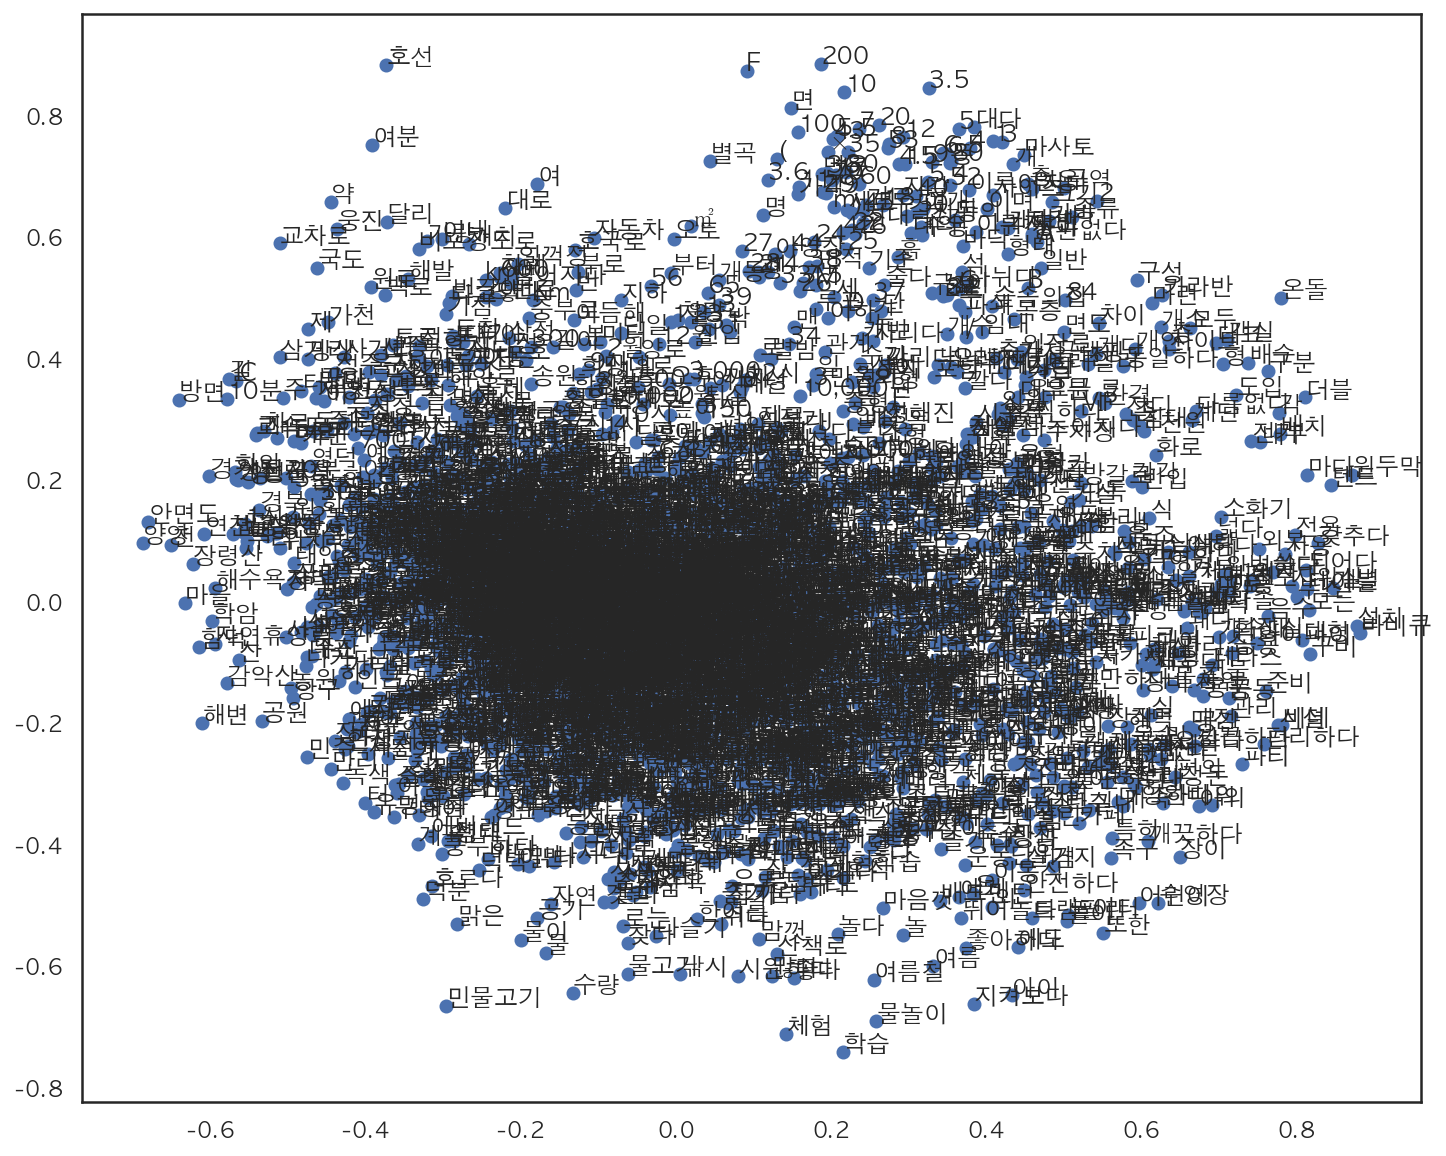

In [236]:
vocabs = list(match_index)

word_vectors_list = [word_vectors[v] for v in vocabs]

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

plt.figure(figsize=(12, 10))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))
plt.show()

IndexError: index 100 is out of bounds for axis 0 with size 100

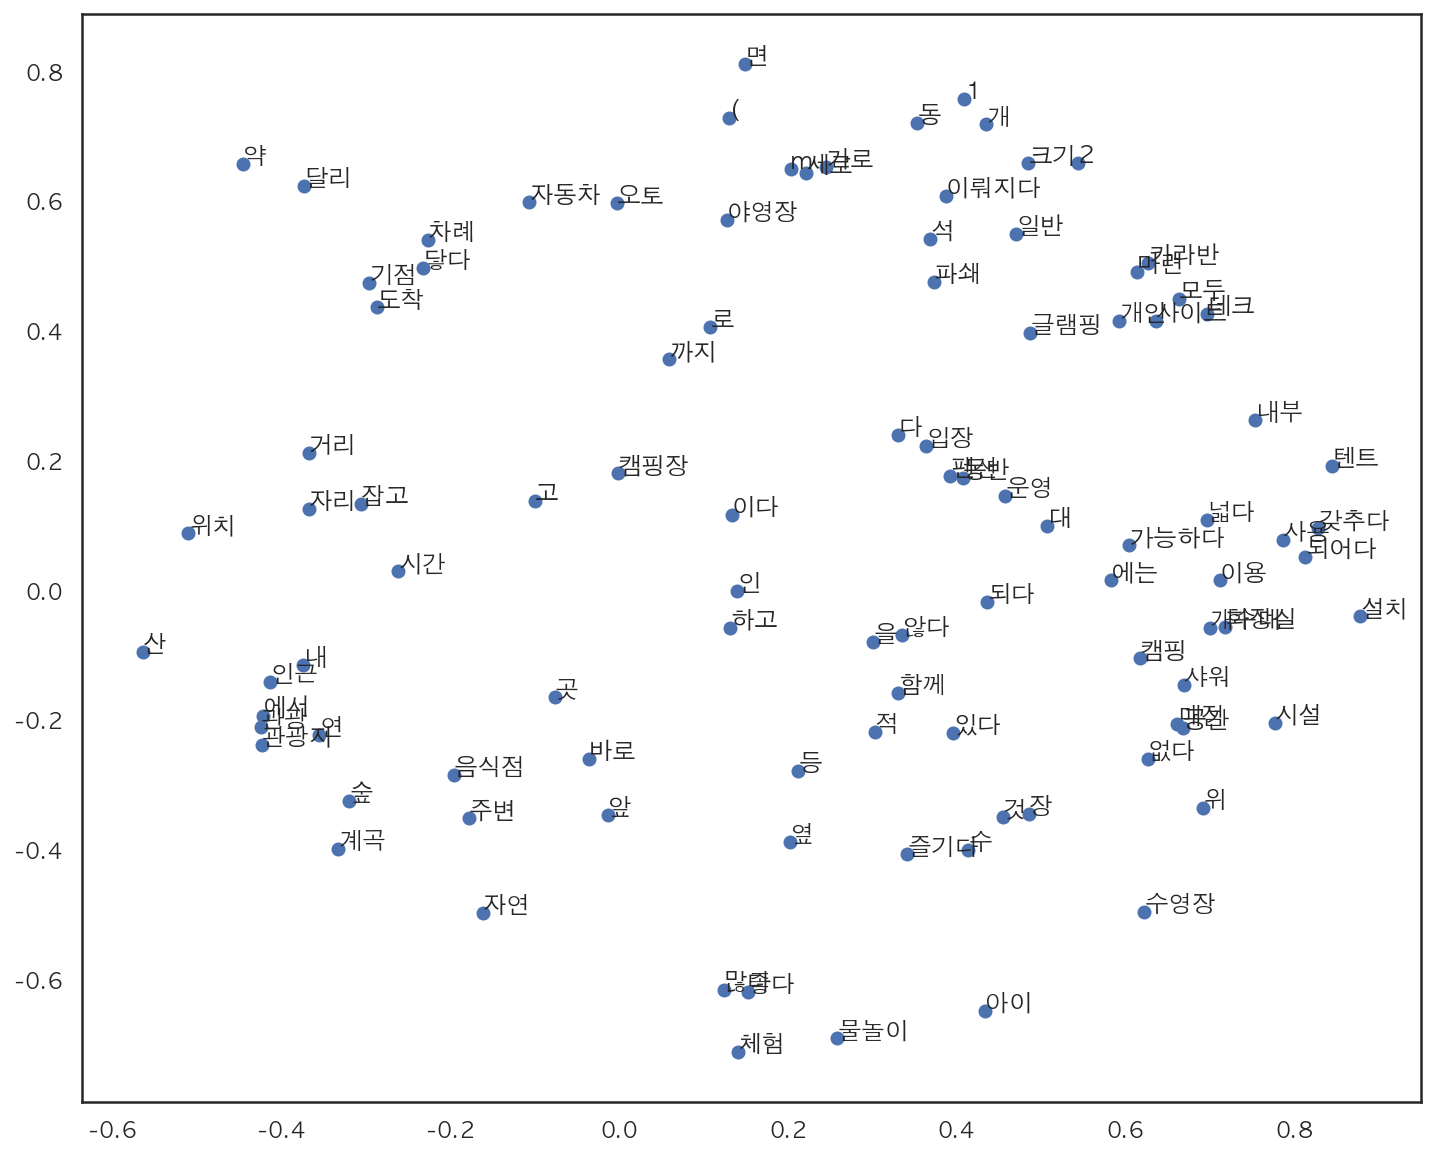

In [237]:
vocabs = list(match_index)

word_vectors_list = [word_vectors[v] for v in vocabs]

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:100, 0]
ys = xys[:100, 1]

plt.figure(figsize=(12, 10))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))
plt.show()

In [39]:
pwd

'/Users/hyunsil/Downloads/Crawling_project3/camping_modeling/review_nlp'